In [16]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings('ignore')  

In [17]:
df = pd.read_csv('student_exam_scores.csv')  
df.head()

,student_id,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score
0,S001,8.0,8.8,72.1,45,30.2
1,S002,1.3,8.6,60.7,55,25.0
2,S003,4.0,8.2,73.7,86,35.8
3,S004,3.5,4.8,95.1,66,34.0
4,S005,9.1,6.4,89.8,71,40.3


In [18]:
df.shape

(200, 6)

In [19]:
df.isnull().sum()

student_id            0
hours_studied         0
sleep_hours           0
attendance_percent    0
previous_scores       0
exam_score            0
dtype: int64

In [20]:
df.dtypes

student_id             object
hours_studied         float64
sleep_hours           float64
attendance_percent    float64
previous_scores         int64
exam_score            float64
dtype: object

In [21]:
df = df.drop(['student_id'], axis= 1) 
df

,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score
0,8.0,8.8,72.1,45,30.2
1,1.3,8.6,60.7,55,25.0
2,4.0,8.2,73.7,86,35.8
3,3.5,4.8,95.1,66,34.0
4,9.1,6.4,89.8,71,40.3
...,...,...,...,...,...
195,10.5,5.4,94.0,87,42.7
196,7.1,6.1,85.1,92,40.4
197,1.6,6.9,63.8,76,28.2
198,12.0,7.3,50.5,58,42.0


In [26]:
X = df.drop(['exam_score'], axis= 1) 
y = df['exam_score'] 

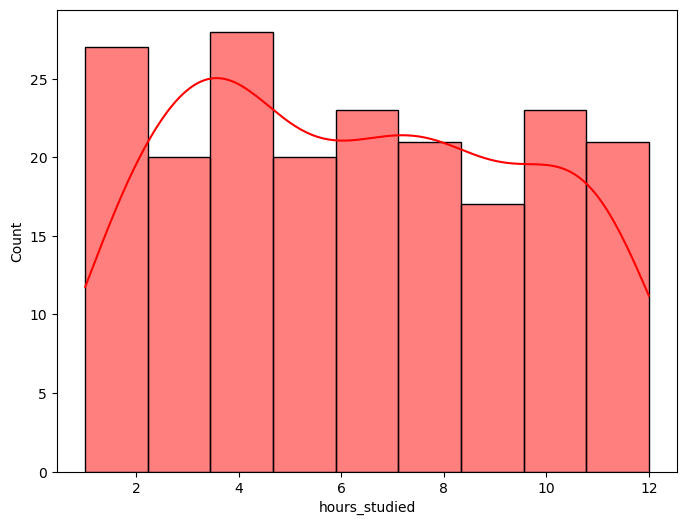

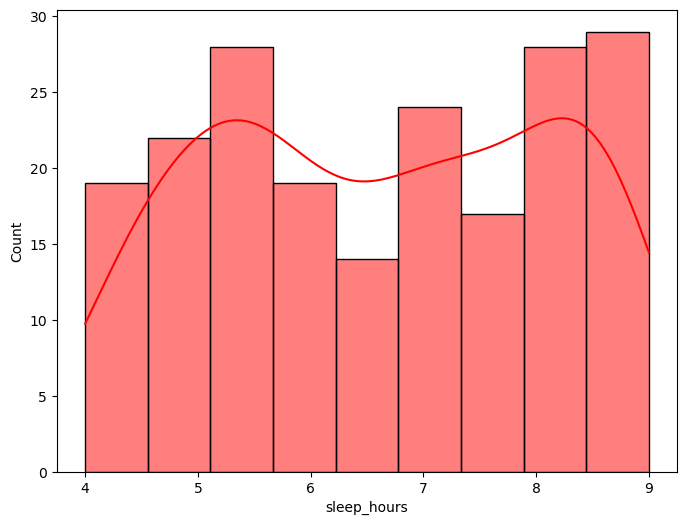

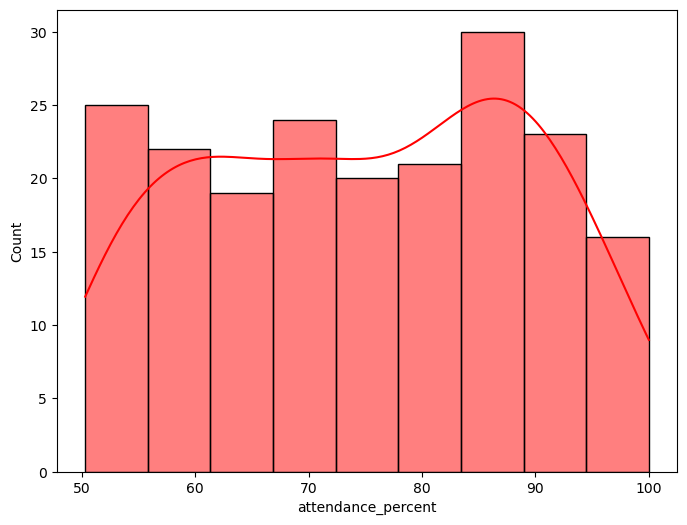

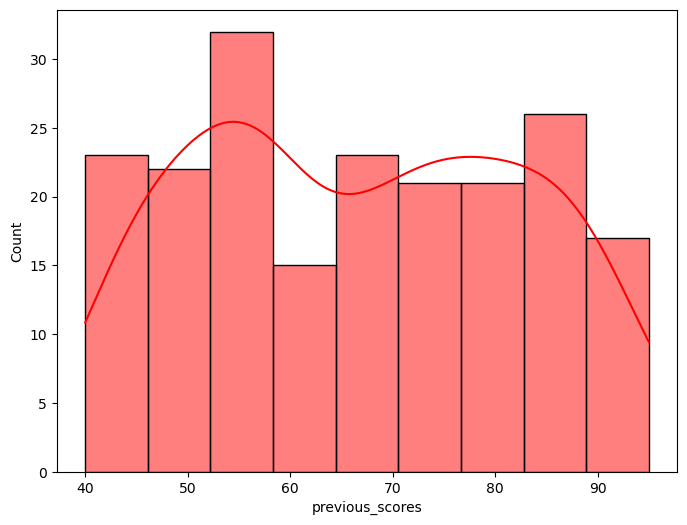

In [27]:
for col in X.columns: 
    plt.figure(figsize= (8, 6)) 
    sns.histplot(X[col], kde= True, color= 'red')

In [28]:
from sklearn.preprocessing import StandardScaler
s_scale = StandardScaler() 
X = s_scale.fit_transform(X) 
X = pd.DataFrame(X, columns= ['hours_studied', 'sleep_hours', 'attendance_percent',
       'previous_scores']) 
X

,hours_studied,sleep_hours,attendance_percent,previous_scores
0,0.520154,1.458426,-0.192061,-1.395230
1,-1.561083,1.324503,-0.994074,-0.755216
2,-0.722376,1.056656,-0.079498,1.228827
3,-0.877692,-1.220042,1.426035,-0.051201
4,0.861850,-0.148655,1.053170,0.268806
...,...,...,...,...
195,1.296735,-0.818272,1.348648,1.292828
196,0.240585,-0.349540,0.722515,1.612835
197,-1.467893,0.186154,-0.775983,0.588813
198,1.762684,0.454000,-1.711664,-0.563212


In [29]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state= 42) 

In [47]:
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression() 
model_lr.fit(X_train, y_train) 
y_pred = model_lr.predict(X_test) 
result = pd.DataFrame({"Real": y_test, "Predict": y_pred}) 

In [48]:
print("Training Accuracy:", model_lr.score(X_train, y_train) * 100) 
print("Testing Accuracy:", model_lr.score(X_test, y_test) * 100)

Training Accuracy: 82.406026630562
Testing Accuracy: 87.11893082758924


In [49]:
score = cross_val_score(model_lr, X, y, cv= 5) 
score.mean()

np.float64(0.8286940493240342)

In [50]:
score.std()

np.float64(0.02418069954972722)

In [51]:
X.columns

Index(['hours_studied', 'sleep_hours', 'attendance_percent',
       'previous_scores'],
      dtype='object')

In [58]:
def test_pred(hours_studied, sleep_hours, attendance_percent, previous_scores): 
    X_input = pd.DataFrame({
        "hours_studied": [hours_studied], "sleep_hours": [sleep_hours], 
        "attendance_percent": [attendance_percent], "previous_scores": [previous_scores]
    })
    X_input = s_scale.transform(X_input) 
    return X_input

hrs_study = float(input("Enter the number of hours for study:"))
sleep_hrs = float(input("Enter the number of hours for sleep:")) 
atted_percent = float(input("Enter the attendence percentage:")) 
prev_score = int(input("Enter your previous score:")) 
pred_test = test_pred(hrs_study, sleep_hrs, atted_percent, prev_score) 
pred_test

Enter the number of hours for study: 8
Enter the number of hours for sleep: 8.8
Enter the attendence percentage: 72.1
Enter your previous score: 45


array([[ 0.52015399,  1.45842605, -0.19206098, -1.39523036]])

In [64]:
print(f"The predicted exam score is {round(model_lr.predict(pred_test)[0], 2)}.")

The predicted exam score is 34.04.


In [65]:
import joblib
joblib.dump(s_scale, 'scalar.pkl')
joblib.dump(model_lr, 'model.pkl')

['model.pkl']